In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.odr as odr
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

[1.91554276 1.55862153]
[[0.13024589        nan]
 [       nan 0.05053125]]


<ipython-input-4-3d84797fd1a9>:15: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov1))


<ErrorbarContainer object of 3 artists>

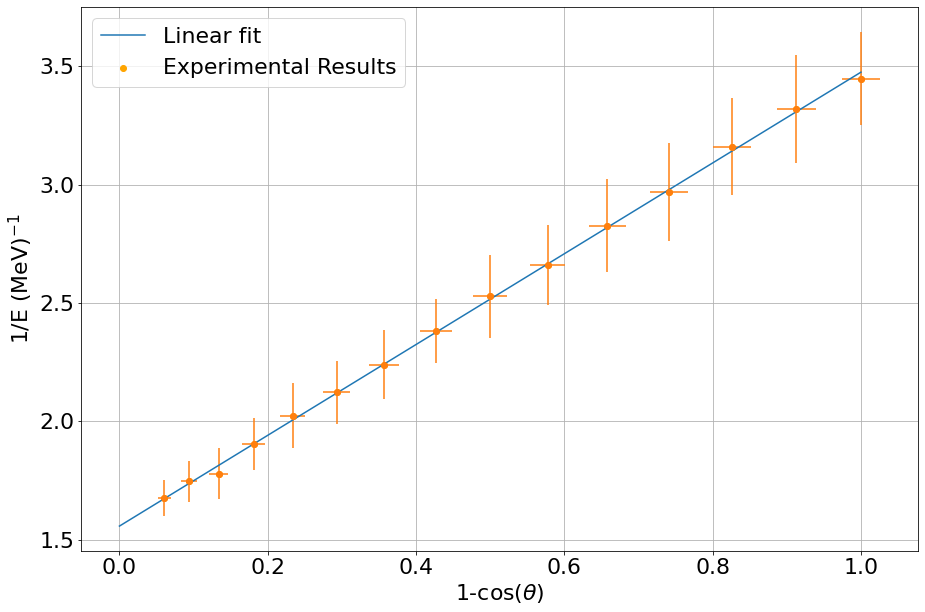

In [4]:
#Plotting relation between scattered photon energy and scattering angle
Angle,KE,Counts,Time,KFWHM,dCounts=np.loadtxt("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Compton\\Compton pt1 data.csv",delimiter=',',\
                                           unpack=True,skiprows=1)
E=KE*1e-3
FWHM=KFWHM*1e-3
#print(FWHM)
#These are to convert to MeV which is used
plt.scatter(1-np.cos(Angle*(np.pi)/180),(1/E),color='orange')
#Linear fitting
def Linfunc(x,m,c):
    return m*x+c
#This is a least squares fit but both methods produce same parameter results to within a reasonable degree
popt1, pcov1 =curve_fit(Linfunc,1-np.cos(Angle*(np.pi)/180),1/(E),sigma=(((E)**(-2))*(0.5*FWHM)),absolute_sigma=True)
print(popt1)
print(np.sqrt(pcov1))
#For plotting fitting func
x1=np.linspace(0,1,1000)
plt.plot(x1,popt1[0]*x1+popt1[1])
plt.grid(True)
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (MeV)$^{-1}$')
plt.legend(['Linear fit','Experimental Results'])
plt.errorbar(1-np.cos(Angle*(np.pi)/180),1/(E),xerr=(1.5*np.pi/180)*np.sin(Angle*(np.pi)/180),yerr=(((E)**(-2))*(0.5*FWHM)),fmt='o')

In [45]:
#ODR version of fit, odr takes list of parameters
def Linfunc2(beta,x):
    return beta[0]*x+beta[1]
linfit=odr.Model(Linfunc2)
#real data command used since have uncertainties not weights, format realdata(x,y,sx,sy)
resultdata=odr.RealData(1-np.cos(Angle*(np.pi)/180),1/(E),(1.5*np.pi/180)*np.sin(Angle*(np.pi)/180),\
                       (((E)**(-2))*(0.5*FWHM)))
#Beta0 is inital guesses taken from least squares fit
myodr1=odr.ODR(resultdata,linfit,beta0=[1.9,1.5])
output1=myodr1.run()
#print parameters and then print parameters standard dev
print(output1.beta)
print(output1.sd_beta)
#Notably lower uncertainties but similar results?
#Actual values outside confidence interval, systematic error in measuring angle?

[1.91568588 1.55857276]
[0.01538428 0.00596479]


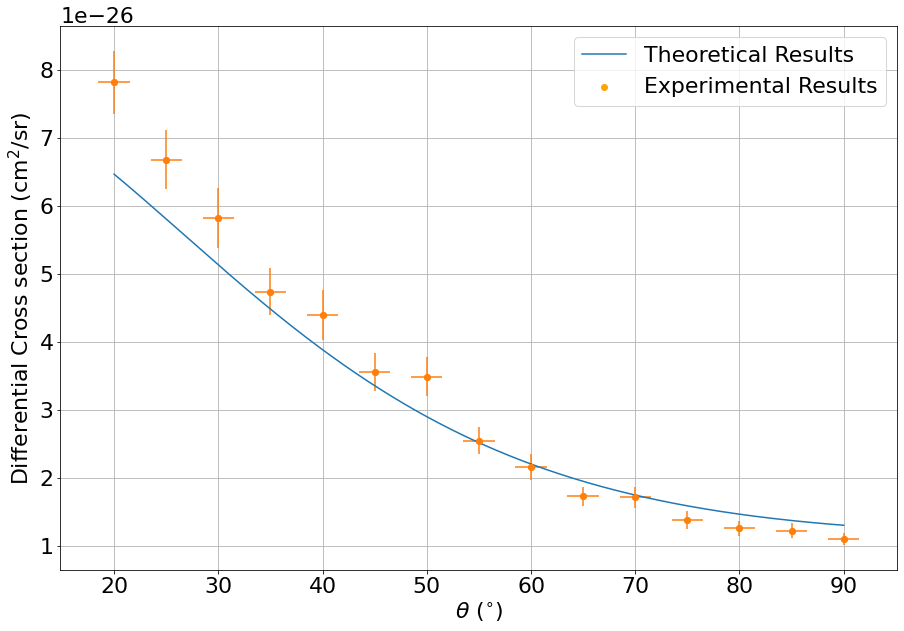

In [46]:
#Klein nishina formula and linspace to plot it with
def Theory(angle):
    rad=angle*(np.pi/180)
    pt1=((2.82*1e-13)**2)/2
    pt2=((1+(np.cos(rad))**2)/((1+1.29*(1-np.cos(rad)))**2))
    pt3=1+(((1.29*(1-np.cos(rad)))**2)/((1+(np.cos(rad))**2)*(1+1.29*(1-np.cos(rad)))))
    return pt1*pt2*pt3
anglespace=np.linspace(20,90,1000)
plt.plot(anglespace,Theory(anglespace))
#Obtaining measured diff cross sec, d signifying uncertainties except dO which is the solid angle
efficiency=0.1522*(E**(-1.132))
dO=np.pi*(0.85/26)**2
Sigma=Counts/(Time*efficiency)
dSigma=dCounts/(Time*efficiency)
deff=(FWHM/2)*(0.17234*E**(-2.1325))

N=2.302e+25
I=3.5986e+5
measured=Sigma/(N*dO*I)
dmeasured=np.sqrt((dSigma/(N*dO*I))**2+((Counts/(Time*N*dO*I*(efficiency**2)))*(deff))**2)
plt.scatter(Angle,4.9*measured,color='orange')
plt.errorbar(Angle,4.9*measured,xerr=1.5,yerr=4.9*dmeasured,fmt='o')
plt.grid(True)
plt.xlabel(r'$\theta$ ($^{\circ}$)')
plt.ylabel('Differential Cross section (cm$^2$/sr)')
plt.legend(['Theoretical Results','Experimental Results'])
#5 from correction factor due to calibration?

In [47]:

#This was used to determine the scale factor that should be used
def bfit(c,angle):
    rad=angle*(np.pi/180)
    pt1=((2.82*1e-13)**2)/2
    pt2=((1+(np.cos(rad))**2)/((1+1.29*(1-np.cos(rad)))**2))
    pt3=1+(((1.29*(1-np.cos(rad)))**2)/((1+(np.cos(rad))**2)*(1+1.29*(1-np.cos(rad)))))
    return c*pt1*pt2*pt3
fitodr=odr.Model(bfit)
mydata=odr.RealData(Angle,measured,1.5,dmeasured)
myodr=odr.ODR(mydata,fitodr,beta0=[0.2])
output=myodr.run()
print(output.beta)
print(output.sd_beta)

[0.20431705]
[0.00698195]


[0.2050443]
[[0.00416651]]


<ErrorbarContainer object of 3 artists>

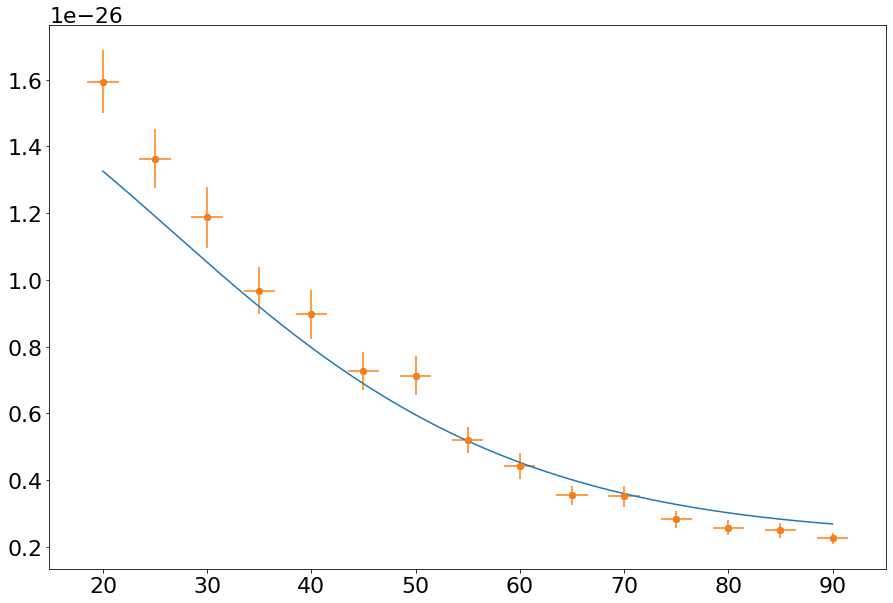

In [48]:
#Least squares version to det scale factor
def afit(angle,b):
    rad=angle*(np.pi/180)
    pt1=((2.82*1e-13)**2)/2
    pt2=((1+(np.cos(rad))**2)/((1+1.29*(1-np.cos(rad)))**2))
    pt3=1+(((1.29*(1-np.cos(rad)))**2)/((1+(np.cos(rad))**2)*(1+1.29*(1-np.cos(rad)))))
    return b*pt1*pt2*pt3
popt2,pcov2 = curve_fit(afit,Angle,measured,sigma=dmeasured,absolute_sigma=True)
print(popt2)
print(np.sqrt(pcov2))
plt.plot(anglespace,afit(anglespace,popt2[0]))
plt.scatter(Angle,measured)
plt.errorbar(Angle,measured,xerr=1.5,yerr=dmeasured,fmt='o')

[4.99687242e-01 5.02500816e+02]
[[4.24378380e-03            nan]
 [           nan 4.94746128e+00]]


<ipython-input-49-4cee10272b58>:14: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov3))


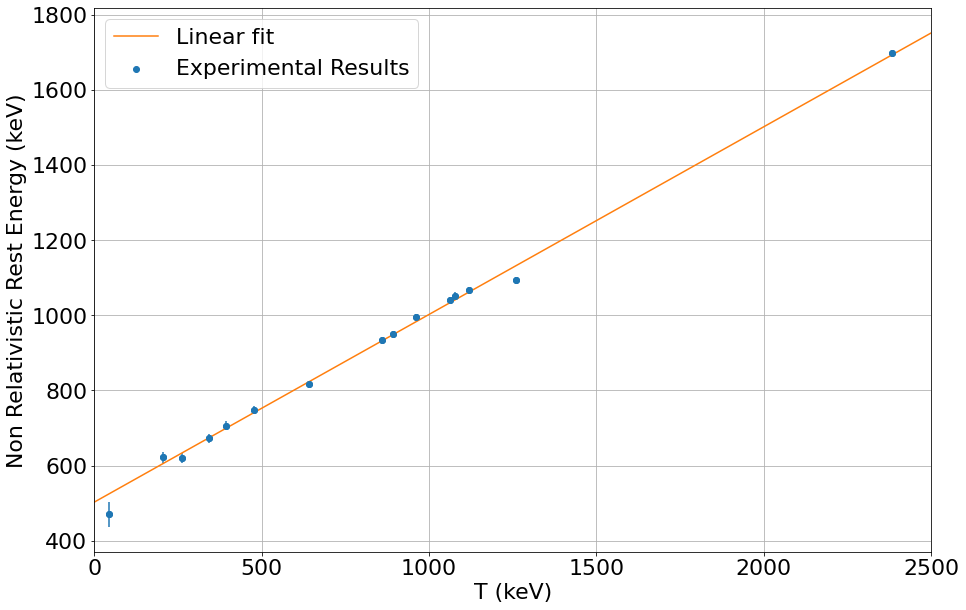

In [49]:
#Non rel rest mass plot, and curve fit use
Eg,T=np.loadtxt("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Compton\\Compton p2.csv",delimiter=',',\
               usecols=(0,1),skiprows=1,unpack=True)
dmde=4*(Eg/T)-1
dmdT=-(2*Eg-T)/(2*T)-2*((2*Eg-T)**2)*(2*T)**(-2)
def mc1(E,T):
    return ((2*E-T)**2)/(2*T)
plt.scatter(T,mc1(Eg,T))
plt.errorbar(T,mc1(Eg,T),xerr=2,yerr=np.sqrt(4*dmde**2+4*dmdT**2),fmt='o')
popt3, pcov3 =curve_fit(Linfunc,T,mc1(Eg,T),sigma=np.sqrt(4*dmde**2+4*dmdT**2),absolute_sigma=True)
Tspace=np.linspace(0,2500,10000)
plt.plot(Tspace,popt3[0]*Tspace+popt3[1])
print(popt3)
print(np.sqrt(pcov3))
plt.grid(True)
plt.xlabel('T (keV)')
plt.xlim(0,2500)
plt.ylabel('Non Relativistic Rest Energy (keV)')
plt.legend(['Linear fit','Experimental Results'])

(502.1281535942885, 0.1753651395077847)
(506.7228568905063, 0.15698061432812815)


Text(0, 0.5, 'Relativistic rest energy (keV)')

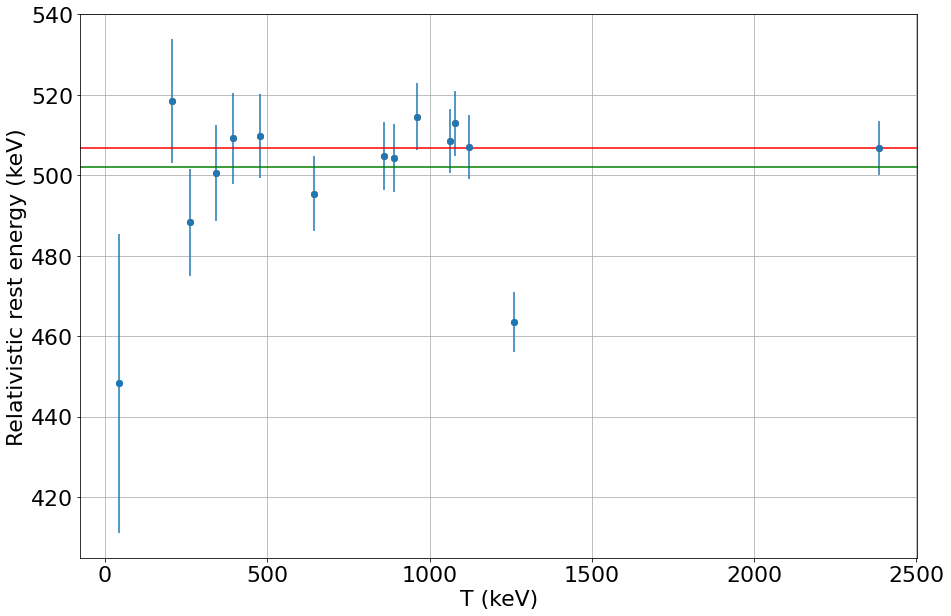

In [52]:
#Relativistic rest mass
def mcr(E,T):
    return (2*E*(E-T))/T
plt.scatter(T,mcr(Eg,T))
dmde1=4*(Eg/T)-2
dmdt1=(-2*Eg*T-2*Eg*(Eg-T))*T**(-2)
merr=2*np.sqrt(dmde1**2+dmdt1**2)

plt.errorbar(T,mcr(Eg,T),xerr=2,yerr=merr,fmt='o')
#np delete used to remove outlier points
mcrev= np.delete(mcr(Eg,T),(6,7))
Trev=np.delete(T,(6,7))
plt.scatter(Trev,mcrev)
merrRev=np.delete(merr,(6,7))
plt.grid(True)
print(np.average(mcr(Eg,T),weights=merr**(-2),returned=True))
print(np.average(mcrev,weights=merrRev**(-2),returned=True))
#Returned argument to give sum of weights
plt.axhline(y=np.average(mcr(Eg,T),weights=merr**(-2)),color='green')
plt.axhline(y=np.average(mcrev,weights=merrRev**(-2)),color='r')
#The -2 power is due to me fixing this, as weights are the sd^-2 
#Uncertainty of a weighted mean is 1/sqrt(sum of weights)
plt.xlabel('T (keV)')
plt.ylabel('Relativistic rest energy (keV)')

[502.37146873]
[3.87684413]


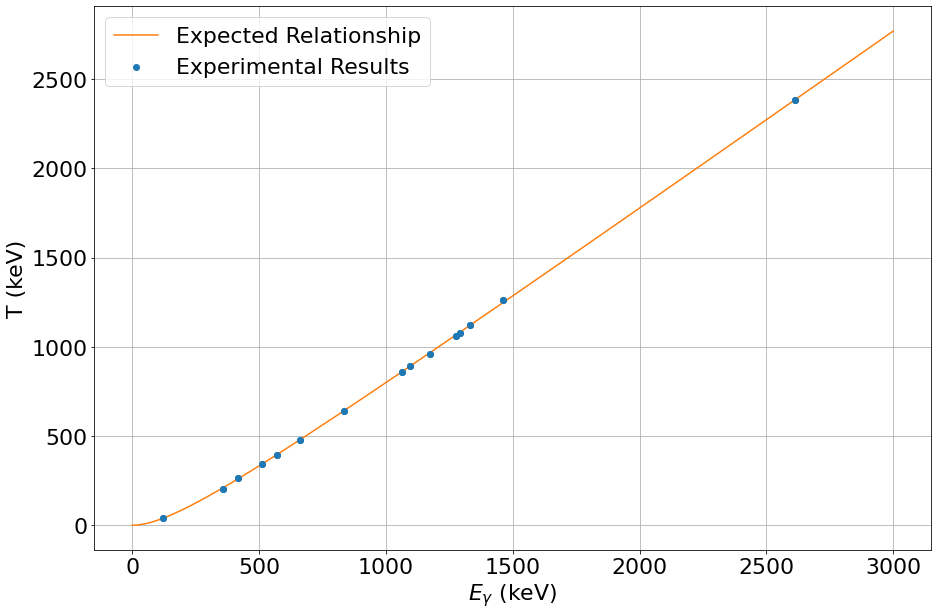

In [53]:
#T and Egamma plot
plt.scatter(Eg,T)
plt.errorbar(Eg,T,xerr=2,yerr=2,fmt='o')
plt.grid(True)
#Theoretical prediction with a corresponding to the rest energy of the electron
def Tfunc(E,a):
    return (2*E**2)/(2*E+a)
popt6,pcov6=curve_fit(Tfunc,Eg,T)
Espace=np.linspace(0,3000,10000)
plt.plot(Espace,Tfunc(Espace,popt6[0]))
plt.xlabel('$E_{\gamma}$ (keV)')
plt.ylabel('T (keV)')
print(popt6)
print(np.sqrt(pcov6[0]))
plt.legend(['Expected Relationship','Experimental Results'])


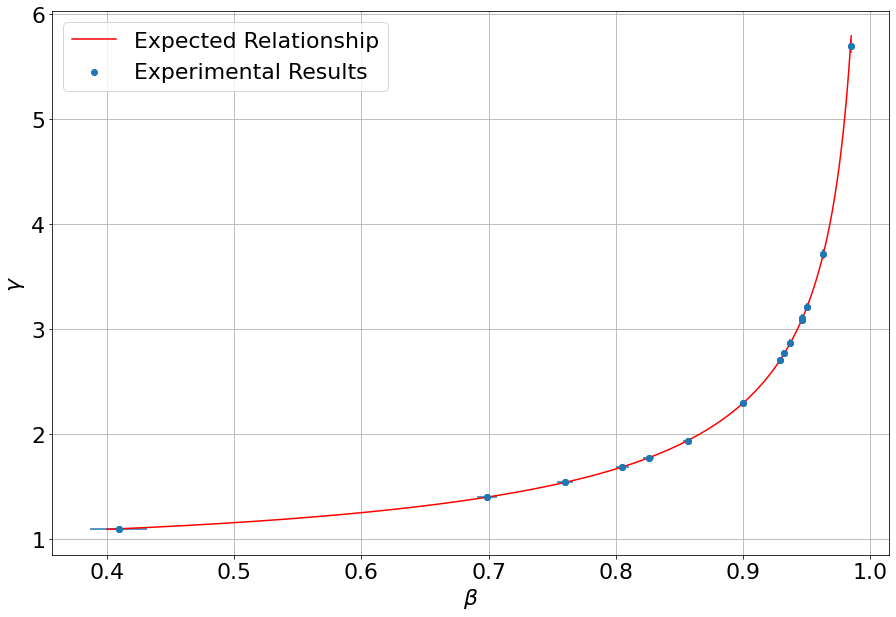

In [54]:
#Beta gamma plot, with uncertainties, partial derivatives denoted by dXdY
Beta=(T*(2*Eg-T))/(T**2-2*Eg*T+2*Eg**2)
Gamma=1+(T**2/(2*Eg*(Eg-T)))
dbde=4*Eg*T*(T-Eg)*(2*Eg**2-2*Eg*T+T**2)**(-2)
dbdT=4*Eg**2*(-T+Eg)*(2*Eg**2-2*Eg*T+T**2)**(-2)
dgde=T**2*(T-2*Eg)*(2*Eg**2*(Eg-T)**(2))**(-1)
dgdT=T*(-T+2*Eg)*(2*Eg*(Eg-T)**(2))**(-1)
plt.scatter(Beta,Gamma)
plt.errorbar(Beta,Gamma,xerr=2*np.sqrt(dbde**2+dbdT**2),yerr=2*np.sqrt(dgde**2+dgdT**2),fmt='o')
Betaspace=np.linspace(0.4,0.985,10000)
#Fitting definition of gamma
plt.plot(Betaspace,1/np.sqrt(1-Betaspace**2),color='r')
plt.grid(True)
plt.xlabel(r'$ \beta $')
plt.ylabel('$\gamma$')
plt.legend(['Expected Relationship','Experimental Results'])